<h1> <font color=''>  $\text{Final Project : Implementation Adam Optimizer}$ </h1> </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# *Load Minist Dataset*

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step




---



#**Adam from Scratch**

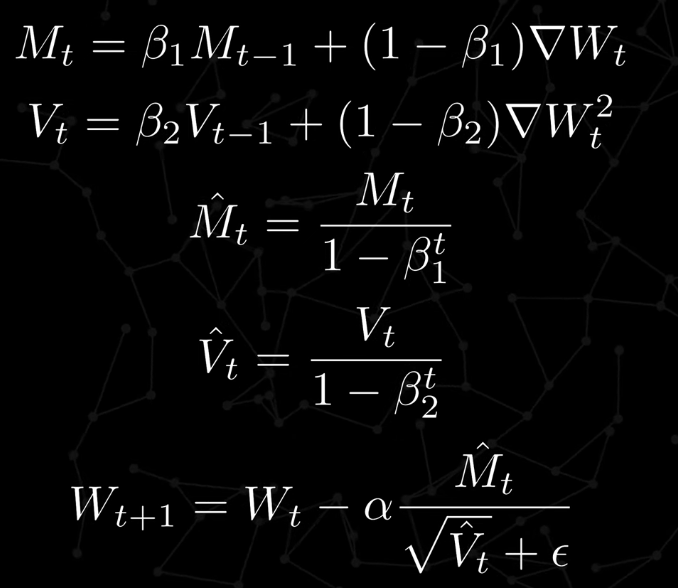

In [ ]:
class AdamOptimizer():
    def __init__(self, eta=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        # Momentum beta1
        self.m_dw = self.beta1 * self.m_dw + (1 - self.beta1) * dw
        self.m_db = self.beta1 * self.m_db + (1 - self.beta1) * db
        # RMS beta2
        self.v_dw = self.beta2 * self.v_dw + (1 - self.beta2) * (dw ** 2)
        self.v_db = self.beta2 * self.v_db + (1 - self.beta2) * (db ** 2)
        # Bias correction
        m_dw_corr = self.m_dw /(1 - self.beta1 ** t)
        m_db_corr=self.m_db / (1 - self.beta1 ** t)
        v_dw_corr = self.v_dw / (1 - self.beta2 ** t)
        v_db_corr = self.v_db / (1 - self.beta2 ** t)
        # Update weights and biases
        w = w - self.eta * (m_dw_corr / (np.sqrt(v_dw_corr) + self.epsilon))
        b = b - self.eta * (m_db_corr / (np.sqrt(v_db_corr) + self.epsilon))
        return w, b

## Initialize weights and biases


In [ ]:
input_size = 784  # 28x28
num_classes = 10
np.random.seed(42)
weights = np.random.randn(input_size, num_classes) * 0.01
biases = np.zeros((1, num_classes))

## Loss function (categorical cross-entropy)


In [ ]:
def loss_function(predictions, labels):
    return -np.mean(np.sum(labels * np.log(predictions + 1e-8), axis=1))

## Softmax function


In [ ]:
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

In [ ]:
batch_size = 128
epochs = 10
learning_rate = 0.001
optimizer = AdamOptimizer(eta=learning_rate)

In [ ]:
losses = []
accuracies = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    t = 1
    epoch_loss = 0
    correct_predictions = 0

    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Forward pass
        logits = np.dot(x_batch, weights) + biases
        predictions = softmax(logits)

        # Compute loss
        loss = loss_function(predictions, y_batch)
        epoch_loss += loss

        # Count correct predictions
        correct_predictions += np.sum(np.argmax(predictions, axis=1) == np.argmax(y_batch, axis=1))

        # Backward pass
        dw = np.dot(x_batch.T, (predictions - y_batch)) / batch_size
        db = np.sum(predictions - y_batch, axis=0, keepdims=True) / batch_size

        # Update weights and biases using custom Adam optimizer
        weights, biases = optimizer.update(t, weights, biases, dw, db)
        t += 1

    # Calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss / (len(x_train) / batch_size)
    accuracy = correct_predictions / len(x_train)

    losses.append(avg_loss)
    accuracies.append(accuracy)

    print(f"Loss after epoch {epoch + 1}: {avg_loss:.4f}, Training Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
Loss after epoch 1: 0.6767, Training Accuracy: 84.66%
Epoch 2/10
Loss after epoch 2: 0.3810, Training Accuracy: 89.87%
Epoch 3/10
Loss after epoch 3: 0.3427, Training Accuracy: 90.61%
Epoch 4/10
Loss after epoch 4: 0.3231, Training Accuracy: 91.11%
Epoch 5/10
Loss after epoch 5: 0.3105, Training Accuracy: 91.41%
Epoch 6/10
Loss after epoch 6: 0.3015, Training Accuracy: 91.63%
Epoch 7/10
Loss after epoch 7: 0.2946, Training Accuracy: 91.82%
Epoch 8/10
Loss after epoch 8: 0.2892, Training Accuracy: 91.94%
Epoch 9/10
Loss after epoch 9: 0.2847, Training Accuracy: 92.08%
Epoch 10/10
Loss after epoch 10: 0.2810, Training Accuracy: 92.18%


## Evaluate on the test set


In [ ]:
logits_test = np.dot(x_test, weights) + biases
predictions_test = softmax(logits_test)
test_accuracy = np.mean(np.argmax(predictions_test, axis=1) == np.argmax(y_test, axis=1))
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


Final Test Accuracy: 92.22%


## Plot some test samples with prediction

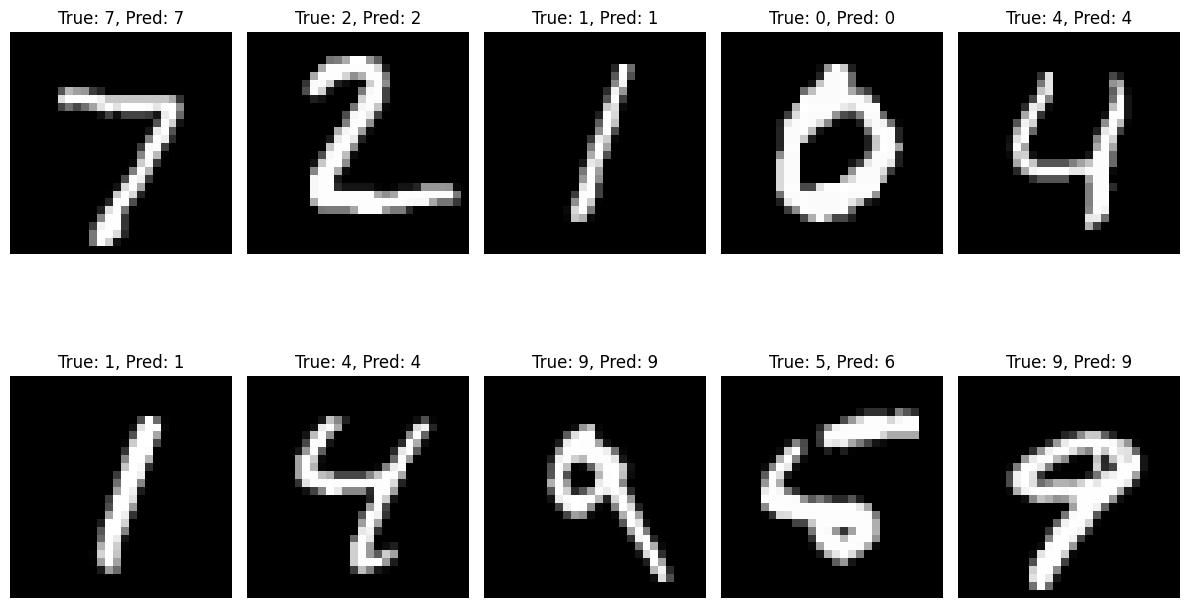

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions_test[i])
    true_label = np.argmax(y_test[i])
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

##  Plot training loss


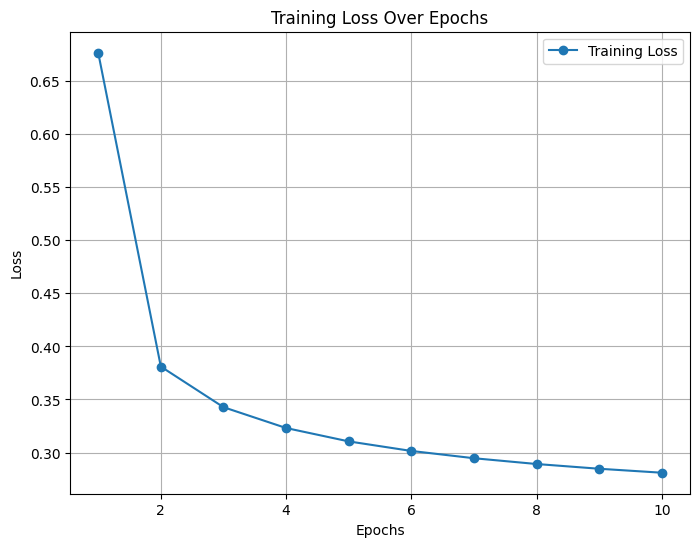

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, marker='o', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

#**Adam Built in**

In [ ]:
model = Sequential([
    Dense(10, activation='softmax', input_shape=(784,))
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Train the model


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7445 - loss: 1.0084 - val_accuracy: 0.9027 - val_loss: 0.3785
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8986 - loss: 0.3807 - val_accuracy: 0.9138 - val_loss: 0.3182
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.3211 - val_accuracy: 0.9169 - val_loss: 0.2955
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.3021 - val_accuracy: 0.9219 - val_loss: 0.2842
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - loss: 0.2897 - val_accuracy: 0.9222 - val_loss: 0.2802
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9227 - loss: 0.2802 - val_accuracy: 0.9237 - val_loss: 0.2738
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2719 - val_accuracy: 0.9255 - val_loss: 0.2722
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.2767 - val_accuracy: 0.

In [ ]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 92.52%


## Plot some test samples with prediction

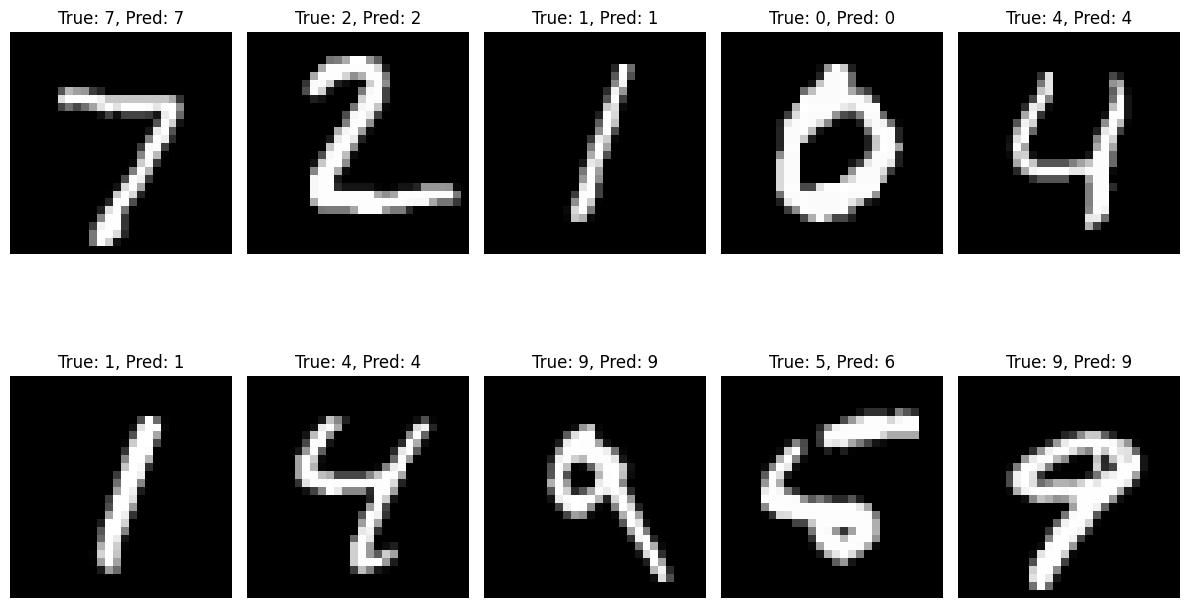

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = tf.argmax(y_test[i]).numpy()
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Plot Training and testing loss

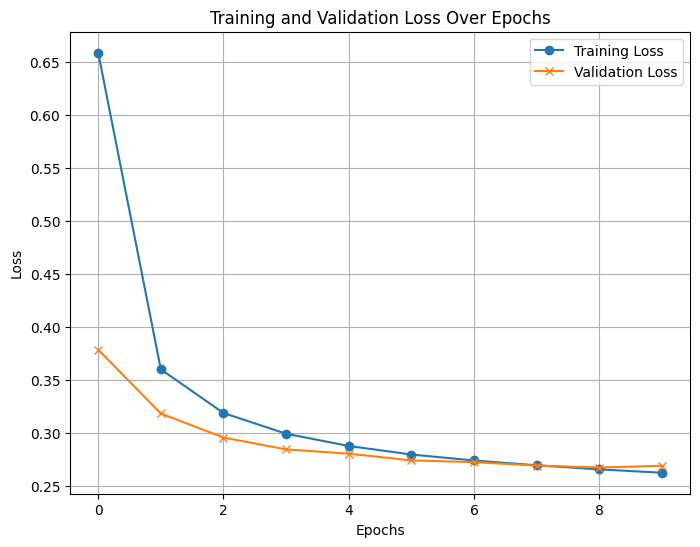

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], marker='o', label="Training Loss")
plt.plot(history.history['val_loss'], marker='x', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()
